## PRUEBAS AB

Descripción del proyecto
Contexto
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 5.5. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

In [129]:
#importamos las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

In [130]:
#leemos los archivos csv
hipotesis = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\hypotheses_us.csv', sep = ';')
orders_df = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\orders_us.csv')
visits_df = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\github\testAB\testAB\visits_us.csv')

In [131]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [132]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [133]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [134]:
#mostramos el dataframe hipotesis 
hipotesis 


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [135]:
#creamos una columna con el framework ICE y lo calculamos impact * confidence / effort
hipotesis['ice'] = (hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort'])
hipotesis.sort_values(by = 'ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


El ICE presenta la 1, 9 y 8  como las hipótesis más prometedoras.


2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [136]:
#creamos una columna llamada RICE
hipotesis['rice'] = hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort']
hipotesis.sort_values(by = 'rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Las hipotesis que mas RICE obtuvieron son la 8 3 y 1 lo que indica que habrá un mayor impacto y menor esfuerzo, maximizando el retorno de la inversión en términos de tiempo y recursos.

3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [137]:
hipotesis[['Hypothesis','rice','ice']].sort_values(by = 'rice', ascending=False)

,Hypothesis,rice,ice
7,Add a subscription form to all the main pages....,112.0,11.200000
2,Add product recommendation blocks to the store...,56.0,7.000000
0,Add two new channels for attracting traffic. T...,40.0,13.333333
6,Show banners with current offers and sales on ...,40.0,8.000000
8,Launch a promotion that gives users discounts ...,16.2,16.200000
3,Change the category structure. This will incre...,9.0,1.125000
1,Launch your own delivery service. This will sh...,4.0,2.000000
5,Add a customer review page. This will increase...,4.0,1.333333
4,Change the background color on the main page. ...,3.0,1.000000


El método RICE prioriza las hipótesis no solo basándose en su impacto, confianza y esfuerzo, sino también en el número de usuarios afectados (Reach). Esto puede cambiar significativamente la priorización, dándole más importancia a las hipótesis que afectan a un mayor número de usuarios. En este caso, H7 se benefició enormemente del factor Reach, subiendo al primer lugar, mientras que H8, que tenía la mayor puntuación ICE, bajó varios puestos debido a su menor alcance.

Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [143]:
#imprimo el dataframe orders
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [144]:
#imprimo el df visits
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [149]:
#convertimos las columnas date en un objeto datetime 


In [150]:
#nos quedamos con los valores unicos 
datesGroups = orders_df[['date', 'group']].drop_duplicates()

In [154]:
ordersAggregated = datesGroups.apply(lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'], orders_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [156]:
visitorsAggregated = datesGroups.apply(lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'], visits_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [158]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [159]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [161]:
#calculamos los ingresos acumulativos de cada grupo (A)
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [163]:
#calculamos los ingresos acumulativos de cada grupo (B)
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


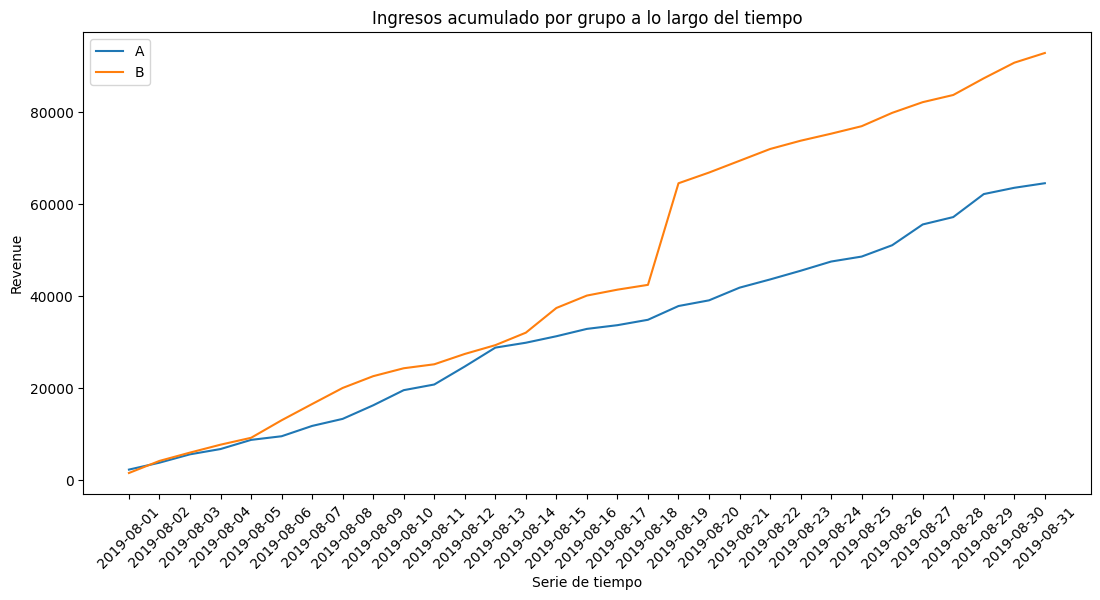

In [171]:
#motramos un grafico de lineas
plt.figure(figsize= (13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.xlabel('Serie de tiempo')
plt.ylabel('Revenue')
plt.title('Ingresos acumulado por grupo a lo largo del tiempo')
plt.legend()
plt.show()

El segmento B tomó la delantera a la mitad de la prueba y siguió así. Parece que los pedidos anormalmente grandes al final afectaron los resultados. Tendremos que deshacernos de ellos cuando realicemos nuestro análisis final.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

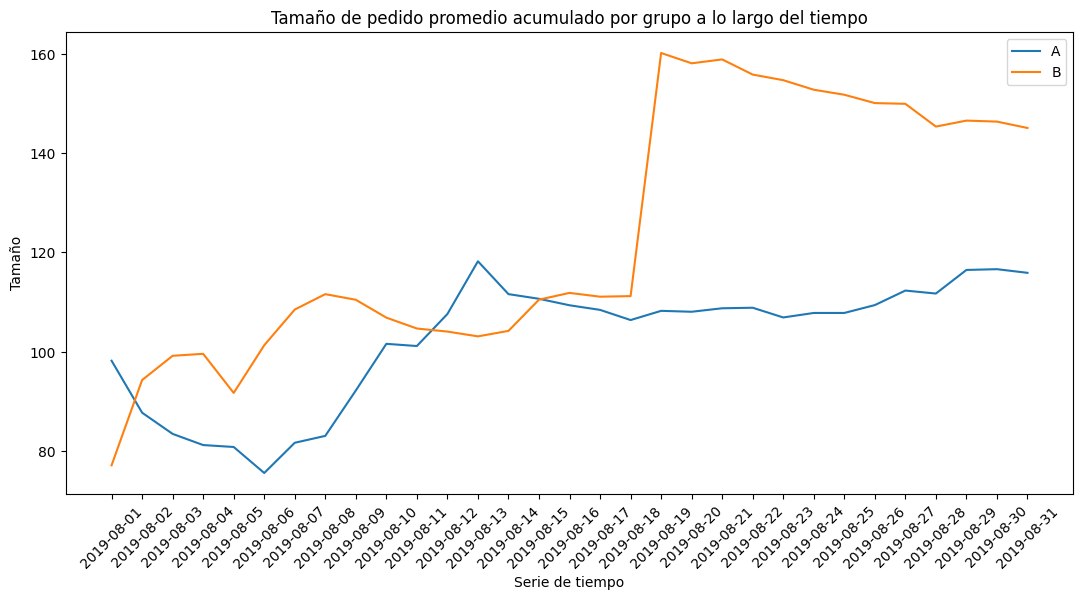

In [172]:
#mostramos el tamaño de pedido promedio acumulado en un grafico de lineas
plt.figure(figsize= (13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.xlabel('Serie de tiempo')
plt.ylabel('Tamaño')
plt.title('Tamaño de pedido promedio acumulado por grupo a lo largo del tiempo')
plt.legend()
plt.show()

El gráfico sugiere que el grupo B tuvo un evento significativo que aumentó temporalmente el tamaño promedio de los pedidos, mientras que el grupo A ha mostrado un crecimiento más constante y estable a lo largo del tiempo. Analizar más a fondo los eventos específicos en el tiempo del pico del grupo B podría proporcionar información valiosa sobre qué factores están impulsando estas tendencias.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [177]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


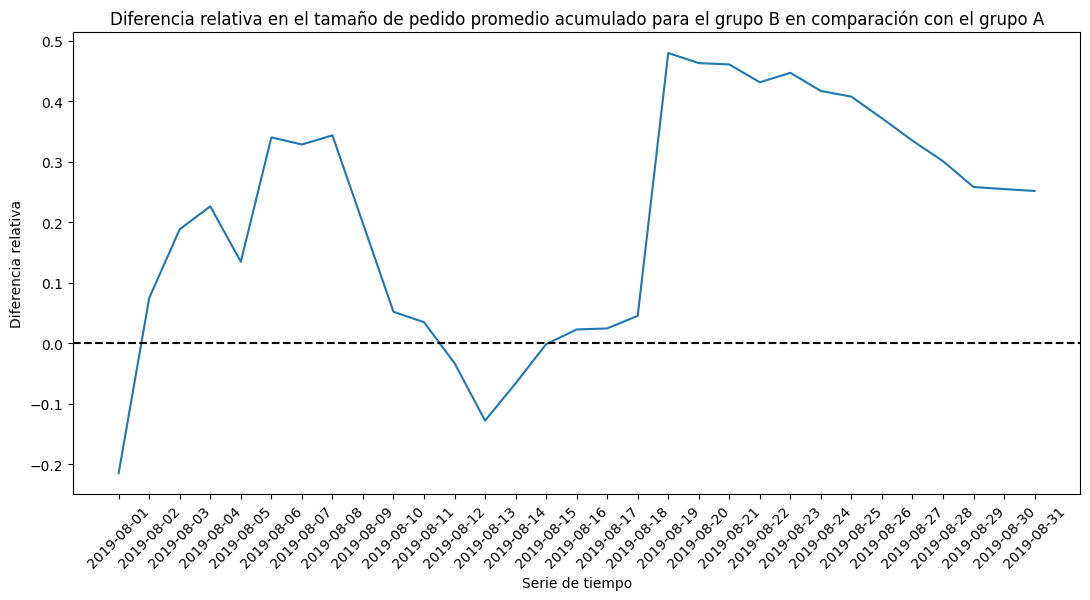

In [183]:
# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(13,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 45)
plt.xlabel('Serie de tiempo')
plt.ylabel('Diferencia relativa')
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A')


# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

La comparación relativa indica que, aunque el grupo B sigue teniendo un rendimiento mejor en términos de tamaño de pedido promedio, la diferencia no es tan estable y está sujeta a fluctuaciones. Esto podría ser indicativo de una mayor sensibilidad del grupo B a ciertos factores externos en comparación con el grupo A.

4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [184]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [187]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


In [191]:
# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()


,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851


In [192]:
# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793


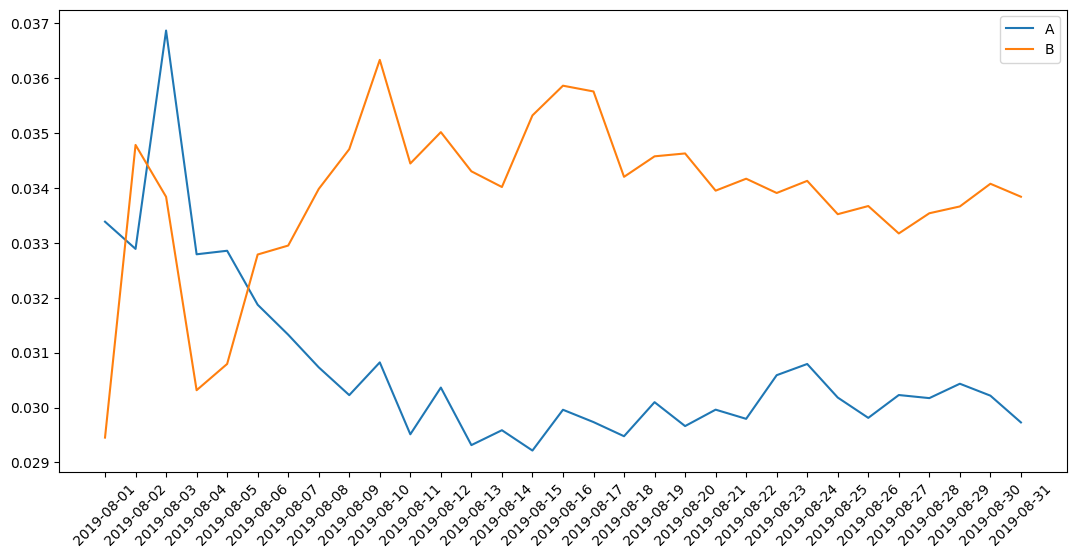

In [194]:
# trazar los gráficos
plt.figure(figsize=(13,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.legend()


El gráfico muestra que el grupo B consistentemente tiene una proporción superior en comparación con el grupo A a lo largo del mes de agosto. Esto sugiere que el grupo B puede estar respondiendo mejor a ciertas condiciones, campañas o estrategias que se implementaron durante este período.

5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [195]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [199]:
#eliminamos las columnas group revenue y date y lo almacenamos en una nueba variable, además agrupamos por cada usuario
#y no lo indexamos y utilizamos el nunique para contar sus valores unicos
ordersByUsers = (
    orders_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [200]:
#cambiamos los nombres de las columnas
ordersByUsers.columns = ['userId', 'orders']

#imprimimos el df ordenada de manera descendente
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

#los números generados de observaciones.
x_values = pd.Series(range(0,len(ordersByUsers)))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


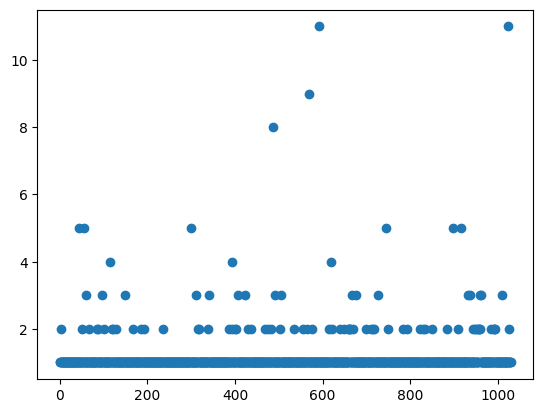

In [201]:
#mostramos el histograma con un scatter
plt.scatter(x_values, ordersByUsers['orders'])
# el rango de números desde 0 hasta el número de observaciones en ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

Existen varios pedidos por usuario viendo que la cantidad maxima de pedidos que hizo un usuario es de 11. 

6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [202]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [203]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


El punto de datos donde se convierte en anomalias es si supera el percentil 99, en este caso 4 pedidos.

7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

In [206]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


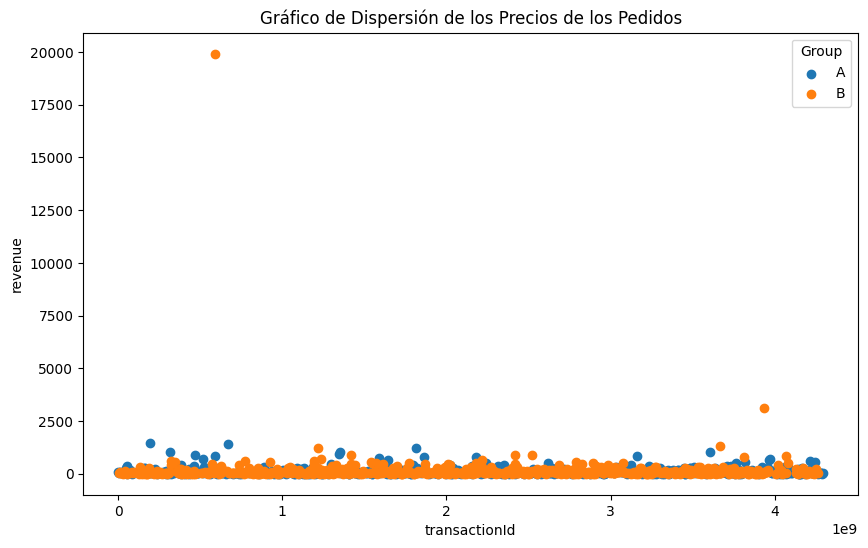

In [207]:
plt.figure(figsize=(10, 6))
groups = orders_df.groupby('group')
for name, group in groups:
    plt.scatter(group['transactionId'], group['revenue'], label=name)
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.xlabel('transactionId')
plt.ylabel('revenue')
plt.legend(title='Group')
plt.show()

Podemos observar que los ingresos (revenue) varían significativamente entre las transacciones.
Hay una transacción en el grupo B con un ingreso significativamente alto (155.1), que es una posible anomalía o una venta grande.

8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [208]:
print(np.percentile(orders_df['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


Un punto de datos se convierte en una anomalía si su valor está por encima del percentil 99, que en este caso es 
900.904
